In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import graphviz
from scipy.stats import randint
import numpy as np

In [ ]:
#path = os.getcwd()
path = "/content/data/games_cleaned.parquet"
caminho_parquet = path #os.path.join(path, 'games_cleaned.parquet')

# Colunas necessárias para análise
colunas_necessarias = ["Genres", 'Tags', 'Categories']

# Carregar apenas as colunas necessárias
df = pd.read_parquet(caminho_parquet, columns=colunas_necessarias)

# Pré-processamento
df['Genres'] = df['Genres'].fillna("Sem Genero")

# Encode categorical features using Label Encoding
le_category = LabelEncoder()
le_genre = LabelEncoder()
le_tags = LabelEncoder()

# Map Genres, Tags, and Categories with numerical encodings
df['Encoded_Categories'] = le_category.fit_transform(df['Categories'])
df['Encoded_Genres'] = le_genre.fit_transform(df['Genres'])
df['Encoded_Tags'] = le_tags.fit_transform(df['Tags'])

# Features and target variable
X = df[['Encoded_Categories', 'Encoded_Genres',  'Encoded_Tags']]
y = df['Encoded_Genres']

# Split the data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest Classifier
print("Start RF")
rf = RandomForestClassifier(n_estimators=70, random_state=42, n_jobs=-1, max_depth=15)
print("End RF")

print("Start fit")
rf.fit(X_train, y_train)
print("End fit")

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Start RF
End RF
Start fit
End fit
Accuracy: 0.7280646294344925


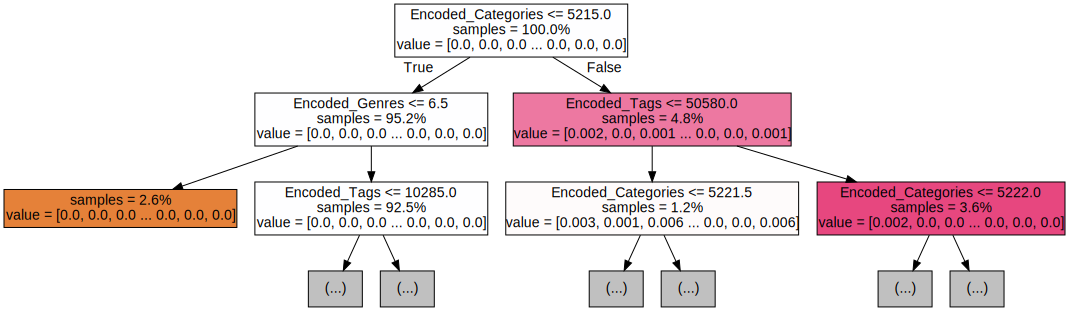

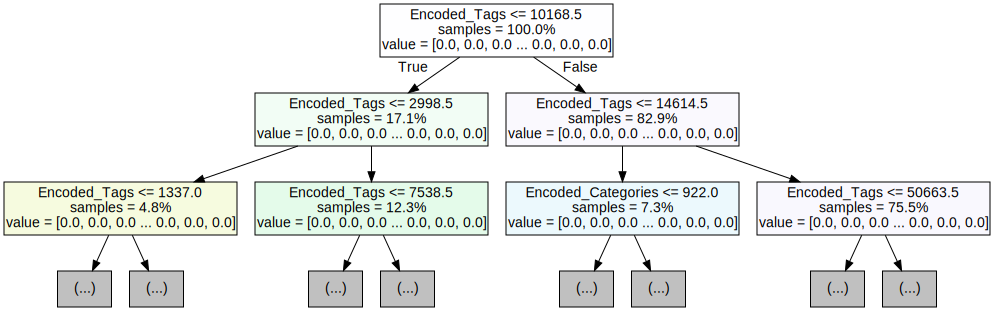

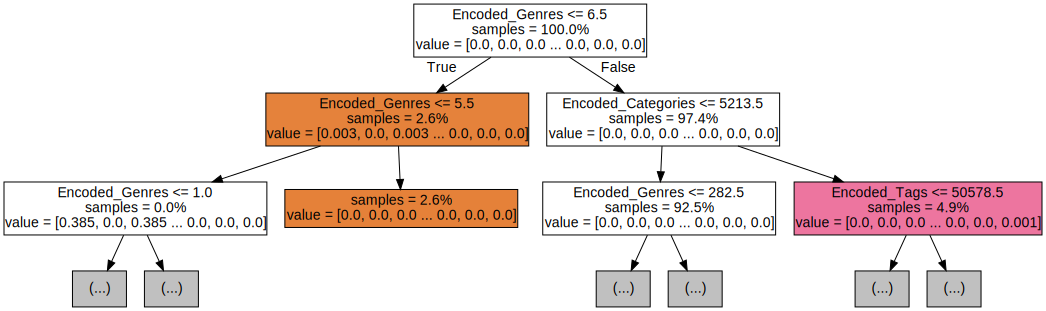

In [ ]:
for i in range(3):
        tree = rf.estimators_[i]
        dot_data = export_graphviz(tree,
                                feature_names=list(X_train.columns),
                                filled=True,
                                max_depth=2,
                                impurity=False,
                                proportion=True)
        graph = graphviz.Source(dot_data)
        display(graph)

A imagem acima mostra tres arvores geradas pelo algoritmo da RF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# prompt: gere um código que classifica os dados do arquivo /content/data/games_cleaned.parquet usando o KNN
path = "/content/data/games_cleaned.parquet"
caminho_parquet = path #os.path.join(path, 'games_cleaned.parquet')

# Colunas necessárias para análise
colunas_necessarias = ["Genres", 'Tags', 'Categories']

# Carregar apenas as colunas necessárias
df = pd.read_parquet(caminho_parquet, columns=colunas_necessarias)

# Pré-processamento
df['Genres'] = df['Genres'].fillna("Sem Genero")

# Encode categorical features using Label Encoding
le_category = LabelEncoder()
le_genre = LabelEncoder()
le_tags = LabelEncoder()

# Map Genres, Tags, and Categories with numerical encodings
df['Encoded_Categories'] = le_category.fit_transform(df['Categories'])
df['Encoded_Genres'] = le_genre.fit_transform(df['Genres'])
df['Encoded_Tags'] = le_tags.fit_transform(df['Tags'])

# Features and target variable
X = df[['Encoded_Categories', 'Encoded_Genres', 'Encoded_Tags']]
y = df['Encoded_Genres']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)  # You can adjust the number of neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier: {accuracy}")

Accuracy of KNN classifier: 0.6668071654373025


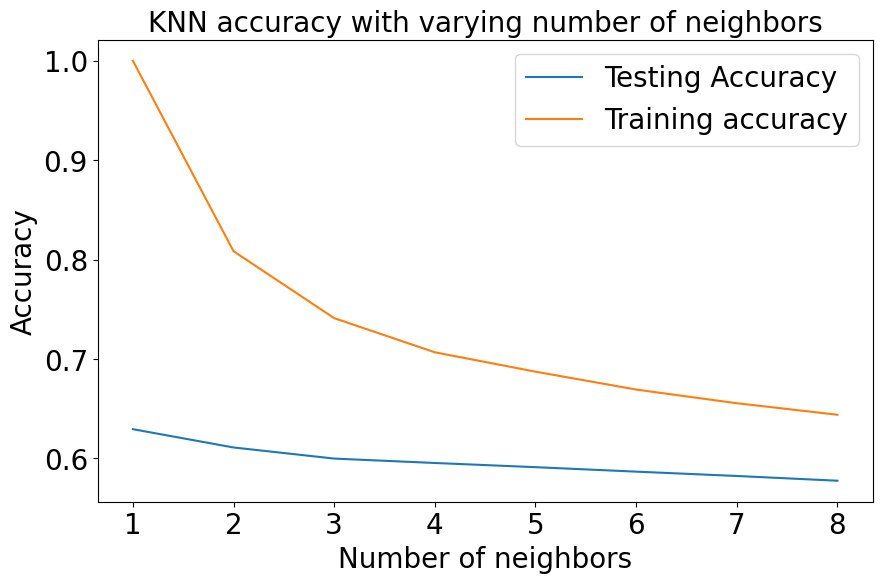

In [ ]:
neighbors = np.arange(1,9)
train_accuracy =np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)

    #Fit the model
    knn.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

O gráfico acima mostra acurácia do modelo KNN aplicado ao nosso dataset de em função do número de vizinhos

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the model
knn.fit(X_train, y_train)

#Compute accuracy on the training set
train_accuracy = knn.score(X_train, y_train)

#Compute accuracy on the test set
test_accuracy = knn.score(X_test, y_test)
print(test_accuracy)

0.7022128556375131
